In [248]:
from math import floor

import matplotlib.pyplot as plt
from keras.src.layers import Conv2D, Flatten, Activation
from keras.src.optimizers import Adam
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import InputLayer

import soundfile as sf
import  numpy as np
import  math
import glob
from pathlib import Path
import os

from tensorflow.python.layers.pooling import MaxPooling2D


In [249]:
from keras.src.layers import Dense


# Feature Extraction
def magAndPhase(speechFrame):
    window = np.hamming(len(speechFrame))
    # print("SpeechFrame ", speechFrame.shape)
    # print("window ", window.shape)
    windowedFrame = speechFrame * window
    xF = np.fft.fft(windowedFrame.squeeze())
    magSpec = np.abs(xF)
    phaseSpec = np.angle(xF)
    # print("magSpec ", magSpec)
    # print("phaseSpec ", phaseSpec)
    return magSpec, phaseSpec

def linearRectangularFilterbank(frame_length, magspec, numChannels):
    # step = 32
    step = int(frame_length)
    fbank = np.zeros(numChannels)
    for i in range(numChannels):
        start = i * step
        end = start + step
        fbank[i] = sum(magspec[start:end])
    return fbank

def matrixFB(frame_length, magSpec, numChannels):
    step = int(frame_length)
    fbank = np.zeros(numChannels)
    for i in range(numChannels):
        r = np.zeros(512)
        start = i * step
        end = start + step
        r[start:end] = 1
        fbank[i] = np.matmul(r, magSpec[0:512])
    return fbank

def labelEncoder(labels):
    LE = LabelEncoder()


    #create an array of 0-19 string
    # classes = ['Ahmed', 'Amber', 'Charlie', 'Christopher', 'Dominic']
    classes = ['Ahmed', 'Amber', 'Charlie', 'Christopher', 'Dominic', 'Emad', 'Emma', 'Hannah', 'Imogen', 'Jess', 'Josh', 'Joshua', 'Kailong', 'Kira', 'Manwel', 'Mateusz', 'Ngozi', 'Riley', 'Sivaprasath', 'Zack']
    LE = LE.fit(classes)
    transformed_label = to_categorical(LE.transform(labels))
    # print("labels", transformed_label)
    return transformed_label, LE

def createModel():
    model = Sequential()
    # numClasses = 5
    numClasses = 20
    model.add(InputLayer(input_shape=(8,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(numClasses, activation='softmax'))
    # model.add(InputLayer(input_shape=8))
    # model.add(Conv2D(64, (3, 3), activation='relu'))
    # model.add(MaxPooling2D(pool_size=(2, 2)))
    # model.add(Flatten())
    # model.add(Dense(256))
    # model.add(Activation('relu'))
    # model.add(Dense(numClasses))
    # model.add(Activation('softmax'))
    return model








processing  names_audio_wav/Ahmed001.wav
=====
processing  names_audio_wav/Ahmed002.wav
=====
processing  names_audio_wav/Ahmed003.wav
=====
processing  names_audio_wav/Ahmed004.wav
=====
processing  names_audio_wav/Ahmed005.wav
=====
processing  names_audio_wav/Ahmed006.wav
=====
processing  names_audio_wav/Ahmed007.wav
=====
processing  names_audio_wav/Ahmed008.wav
=====
processing  names_audio_wav/Ahmed009.wav
=====
processing  names_audio_wav/Ahmed010.wav
=====
processing  names_audio_wav/Ahmed011.wav
=====
processing  names_audio_wav/Ahmed012.wav
=====
processing  names_audio_wav/Ahmed013.wav
=====
processing  names_audio_wav/Ahmed014.wav
=====
processing  names_audio_wav/Ahmed015.wav
=====
processing  names_audio_wav/Ahmed016.wav
=====
processing  names_audio_wav/Ahmed017.wav
=====
processing  names_audio_wav/Ahmed018.wav
=====
processing  names_audio_wav/Ahmed019.wav
=====
processing  names_audio_wav/Ahmed020.wav
=====
processing  names_audio_wav/Amber001.wav
=====
processing  n

/Users/becca/Coursework/avp/.venv/lib/python3.13/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


452/452 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - accuracy: 0.0664 - loss: 2.9835 - val_accuracy: 0.0509 - val_loss: 2.9787
Epoch 2/30
452/452 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - accuracy: 0.0678 - loss: 2.9774 - val_accuracy: 0.0731 - val_loss: 2.9736
Epoch 3/30
452/452 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.0675 - loss: 2.9760 - val_accuracy: 0.0742 - val_loss: 2.9696
Epoch 4/30
452/452 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.0691 - loss: 2.9741 - val_accuracy: 0.0742 - val_loss: 2.9603
Epoch 5/30
452/452 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - accuracy: 0.0722 - loss: 2.9705 - val_accuracy: 0.0676 - val_loss: 2.9721
Epoch 6/30
452/452 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.0709 - loss: 2.9669 - val_accuracy: 0.0781 - val_loss: 2.9569
Epoch 7/30
452/452 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - accuracy: 0.0745 - loss: 2.9638 - val_accuracy: 0.0786 - val_loss: 2.9608
Epoch 8/30
452/452 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.0768 - loss: 2.9617 - val_accurac

Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_96 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_97 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_98 (Dense)                │ (None, 20)             │         1,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,110 (70.75 KB)

 Trainable params: 6,036 (23.58 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 12,074 (47.17 KB)

accuracy: 7.526286662977311
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
predicted_prob: [[0.0561321  0.0579467  0.05128629 0.042907   0.04375235 0.04387544
  0.06159928 0.05555429 0.04888953 0.03118432 0.04626269 0.04297499
  0.04227649 0.05222986 0.03697105 0.04629884 0.06687999 0.06020683
  0.04946516 0.06330681]]
predicted class: ['Ngozi']


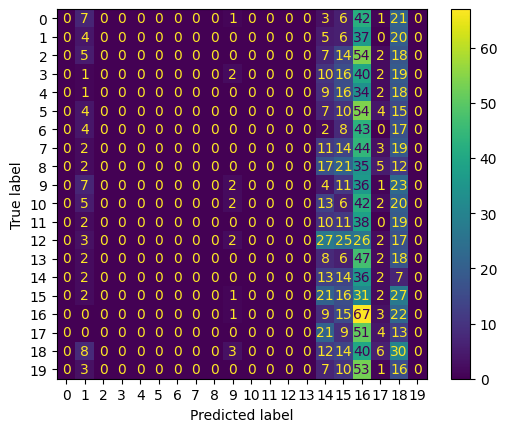

In [250]:
from sklearn import metrics

data = []
data_copy =[]
labels = []
max_frames =8
counter = 0

# Read Audio

# for  audio_file in sorted(glob.glob('sample_wav/*.wav')):
for  audio_file in sorted(glob.glob('names_audio_wav/*.wav')):
    print("processing ", audio_file)
    # if counter >= 5:
    #     break
    # counter +=1

    r_in, fs_in = sf.read(f'{audio_file}', dtype='float32')
    # print("number of shape", r_in.shape)
    # print("number of dimensions", r_in.ndim)
    if r_in.ndim > 1:
        r_in = r_in[:,0]

    duration = 20
    # duration = len(r_in) / fs_in
    frame_length = int( duration/1000 * fs_in)
    numFrames = floor(len(r_in) / frame_length)
    # print("numFrames", numFrames)

    for frame in range(numFrames):
        start = frame * frame_length
        end = start + frame_length
        short_frame = r_in[start:end]
        magSpec, phaseSpec = magAndPhase(short_frame)
        # print("length of magSpec", len(magSpec))

        # print("Before filter", r_in.shape)
        fbank = linearRectangularFilterbank(frame_length,magSpec, 8)

        frames = fbank.shape[0]
        # print("Before padding", fbank.shape)
        # if frames < max_frames:
        #     fbank = np.pad(fbank, ((0,0), (0, max_frames-fbank.shape[1])) )
            # print("Afrer padding", fbank.shape)
        # max_frames = max(max_frames, frames)
        data.append(fbank)
        label = audio_file.split('/')[-1].split('.')[0]
        label = label[0:-3]
        labels.append(label)
    print("=====")



#Convert to numpy for NN
data = np.array(data)
labels = np.array(labels)

#Normalize data
data = data/np.max(data)
print("normalised data" , data.shape)



# np.save('data', data)
# np.save('labels', labels)

labels,LE = labelEncoder(labels)
# print('data shape', data.shape)
# print('label shape', labels.shape, labels[0:5])
print(data[0])
print("============")
X_train,X_tmp, y_train, y_tmp = train_test_split(data, labels, test_size=0.2, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=0)

# integer_labels = np.argmax(y_train, axis=1)
# print(integer_labels)


model = createModel()

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam(learning_rate=0.01))
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32,epochs=30,verbose=1)
model.summary()
model.save_weights('model_weights.weights.h5')
predicted_probabilities = model.predict(X_test, verbose=0)
predicted = np.argmax(predicted_probabilities, axis=1)
actual = np.argmax(y_test, axis=1)
accuracy = metrics.accuracy_score(actual, predicted)
print("accuracy:", accuracy *100)



# integer_labels = np.argmax(X_test, axis=0)
# print("integer_labels", integer_labels)

# predicted_prob = model.predict(np.expand_dims(X_test[0], axis=0), verbose=0)

predicted_prob = model.predict(np.expand_dims(X_test[0,:], axis=0), verbose=1)
print("predicted_prob:", predicted_prob)
predicted_id = np.argmax(predicted_prob, axis=1)
predicted_class = LE.inverse_transform(predicted_id)
print("predicted class:", predicted_class)

# plt.imshow(X_test[0,:], cmap='viridis')
# plt.title("Predicted Class")
# plt.colorbar()
# plt.show()

confusion_matrix = metrics.confusion_matrix(np.argmax(y_test, axis=1), predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
cm_display.plot()




In [251]:
# Acoustic Modeling
# for d in range(len(data)):




In [252]:
# Noise Compensation

In [253]:
# Testing & Evaluation